## Importing Modules

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

## Preproccesing

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")


###### Replacing  Zero Values with mean : 

In [4]:
df['BMI'] = df['BMI'].replace(0 , df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [12]:
x = df.drop(columns=["Outcome"])
y = df["Outcome"]
scalar = StandardScaler()
x = pd.DataFrame(scalar.fit_transform(x) , columns=x.columns) # Standard Scaling 
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


## Training and Prediction 

###### 1. Training

In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 1/3 , random_state=42)
logistic_lib = LogisticRegression(solver="liblinear" , penalty = "l2" )
logistic_lib.fit(x_train,y_train)
print("Logistic Regression  Accuracy : " , logistic_lib.score(x_test,y_test))

Logistic Regression  Accuracy :  0.75


##### 2. Prediction : 

In [58]:
y_pred = logistic_lib.predict(x_test)
print("Probabilities : ")
print( logistic_lib.predict_proba(x_test.iloc[1:3,:]) )
print("Prediction classes : ")
print( logistic_lib.predict(x_test.iloc[1:3,:]))

Probabilities : 
[[0.81465075 0.18534925]
 [0.88587653 0.11412347]]
Prediction classes : 
[0 0]


##### 3. Scores 

In [84]:
print("accuracy score : " , accuracy_score(y_test ,y_pred ))
print("roc_auc_score : " , roc_auc_score(y_test , y_pred))
print("Confusion Matrix : ")
print(confusion_matrix(y_test , y_pred))
auc = roc_auc_score(y_test , y_pred)
fpr , tpr , threshold = roc_curve(y_test , y_pred )

accuracy score :  0.75
roc_auc_score :  0.711217510259918
Confusion Matrix : 
[[141  29]
 [ 35  51]]


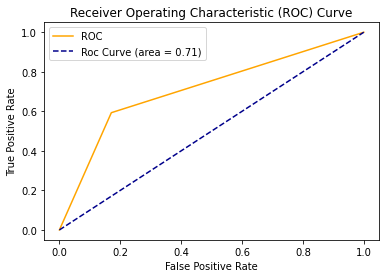

In [88]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label=f"Roc Curve (area = {round(auc , 2)})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()